<a href="https://colab.research.google.com/github/Boris-Kuliev/My_First_Test_Repo/blob/main/informatika/2semestr/laba_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Список инцидентности:  [[0, 1], [0, 2], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4]]


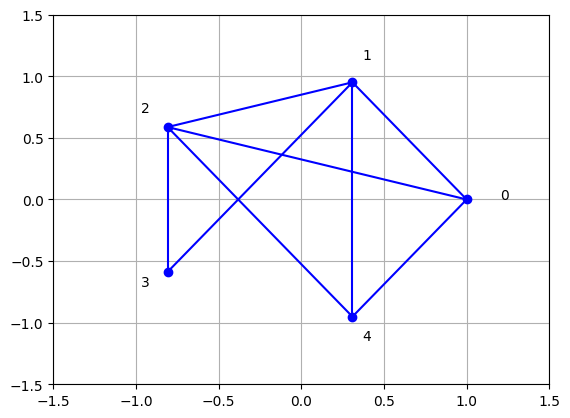

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Список инцидентности
I = [[0,1],[0,2],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4]]
print('Список инцидентности: ', I)

# Число вершин
N = 5

# Рассчитываем координаты всех вершин
x = np.zeros(N)
y = np.zeros(N)
for k in range(N):
    x[k] = np.cos(2*np.pi*k/N)
    y[k] = np.sin(2*np.pi*k/N)

# чертим вершины
plt.figure(1)
plt.plot(x,y,'bo')
plt.grid()
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

# Подписываем вершины
for k in range(N):
    plt.text(x[k]*1.2, y[k]*1.2,str(k))

# Чертим ребра
for k in range(len(I)):
    v_1 = I[k][0]
    v_2 = I[k][1]
    x1 = x[v_1]
    y1 = y[v_1]
    x2 = x[v_2]
    y2 = y[v_2]
    # Чертим прямую
    plt.plot([x1,x2],[y1,y2],'b')

plt.show()

In [52]:
import numpy as np

# Поиск числа контуров
def deep_search_cycle(curr_v, prev, sp_v, sp_cont, Z):
    # Обходим все вершины смежные с текущей
    for k in Z[curr_v]:
        # Если смежная вершина еще не в списке посещенных,
        # и мы пришли не из нее, то начинаем обход с нее, при этом - ЗАПОМИНАЯ МАРШРУТ.
        if k not in sp_v and k!=prev:
            # для запоминания маршрута необходимо передать
            # в следующие ветви рекурсии КОПИЮ списка посещенных вершин
            q = sp_v.copy()
            q.append(k)
            # в итоге в каждой ветви рекурсии будут копии списка посещенных вершин,
            # т.е. различные маршруты обхода вершин графа
            deep_search_cycle(k, curr_v, q, sp_cont, Z)
        # Если смежная вершина в списке посещенных,
        # то это значит что мы нашли контур
        if k in sp_v and k!=prev:
            # Добавляем вершину к контуру
            q = sp_v.copy()
            q.append(k)
            # Разбиваем контур на ребра начиная с вершины k
            c = [q[i:i+2] for i in range(q.index(k), len(q)-1)]
            # Каждое ребро сортируем для единообразия
            for k in c:
                k.sort()
            # Сортируем весь список ребер для единообразия
            c.sort()
            # Если такого списка ребер еще нет в списке маршрутов
            # то добавляем его туда
            if c not in sp_cont:
                # Добавляем контур к списку контуров
                sp_cont.append(c)

# Список инцидентности
I = [[0,1],[0,2],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4]]
print('Список инцидентности: ', I)

# Число вершин
N = 5

# Составляем список смежности
Z = []
for k in range(N):
  Z.append([])
# перебераем все ребра
for ed in I:
  Z[ed[0]].append(ed[1])
  Z[ed[1]].append(ed[0])
print('Список смежности: ', Z)

sp_c = [] # Создаем список контуров (пока пустой)
# Для каждой вершины запускаем алгоритм обхода
for k in range(N):
    sp_v = [k]
    deep_search_cycle(k, -1, sp_v, sp_c, Z)
    
#print('Список контуров ', sp_c)
print('Число контуров ', len(sp_c))


Список инцидентности:  [[0, 1], [0, 2], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4]]
Список смежности:  [[1, 2, 4], [0, 2, 3, 4], [0, 1, 3, 4], [1, 2], [0, 1, 2]]
Число контуров  12


In [49]:
import numpy as np

# Список инцидентности
I = [[0,1],[0,2],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4]]
print('Список инцидентности: ', I)

# Число вершин
N = 5

R = len(I)
M = np.zeros([N, R], dtype=int)
for k in range(R):
    ed = I[k]
    M[ed[0], k] = 1
    M[ed[1], k] = 1
    
print('Матрица инцидентности:')
print(M)


Список инцидентности:  [[0, 1], [0, 2], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4]]
Матрица инцидентности:
[[1 1 1 0 0 0 0 0]
 [1 0 0 1 1 1 0 0]
 [0 1 0 1 0 0 1 1]
 [0 0 0 0 1 0 1 0]
 [0 0 1 0 0 1 0 1]]


In [53]:
import numpy as np

# Находим число вершин
N = 0
# перебераем все ребра
for ed in I:
  # берем максимальный номер вершины в ребре
  mv = np.max(ed)
  # если он больше, чем кол-во вершин минус 1 (т.к. вершину нумеруются с нуля)
  if mv > N-1:
    N = mv + 1
print('Число вершин: ', N)
print('Число ребер: ', len(I))

S = np.zeros(N, dtype=int)
# перебераем все ребра
for ed in I:
  S[ed[0]] += 1
  S[ed[1]] += 1
print('Степени вершин: ', S)


Число вершин:  5
Число ребер:  8
Степени вершин:  [3 4 4 2 3]
